In [2]:
#GRAB SAFETY CHALLENGE - Programming with Data Project
#Prediction using KNN and SVM model

In [3]:
#Importing Libraries
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Exploring Datasets
df_labels = pd.read_csv("label_data.csv")
df_labels

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0
5,283467841567,0
6,231928234141,0
7,188978561143,0
8,1194000908346,0
9,274877906944,1


In [5]:
df_features = pd.read_csv("grabfeatures1.csv")
df_features

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.000000,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.000000,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.000000,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.000000,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.000000,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409
5,1185410973787,3.900,178.000000,0.805649,9.206902,2.954445,-0.057104,-0.043555,0.002334,533.0,19.250000
6,163208757379,10.000,262.184418,0.599490,-9.180023,-2.520432,0.026767,-0.030687,-0.006071,556.0,2.110000
7,884763262976,3.000,48.000000,0.109022,10.043245,-0.196497,-0.000698,-0.001902,0.015586,200.0,0.000000
8,841813590178,16.000,44.041702,1.306946,-7.427310,-5.655457,0.013766,-0.017083,0.003231,115.0,13.914648
9,300647710810,6.000,165.000000,0.897853,7.903501,4.932206,0.021364,0.001613,0.009384,824.0,26.602882


In [6]:
#Merging Dataset
df = pd.merge(df_features,df_labels,on="bookingID")
df

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1202590843006,3.000,353.000000,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000,1
1,1202590843006,3.033,77.000000,1.137217,8.975278,3.981050,0.021118,-0.022515,0.024522,541.0,0.000000,1
2,1202590843006,6.173,283.000000,1.522818,7.947064,5.075056,0.137567,-0.297055,-0.017418,154.0,2.863286,1
3,1202590843006,3.014,353.000000,1.134775,8.932489,3.929421,-0.007959,-0.020543,-0.022986,1384.0,0.000000,1
4,1202590843006,5.209,340.000000,0.858197,9.078037,2.944571,0.061924,0.015219,0.025517,1142.0,9.750134,1
5,1202590843006,3.014,326.000000,1.030723,9.093197,3.593553,0.019164,0.004416,0.001449,812.0,0.000000,1
6,1202590843006,3.000,315.000000,0.938498,8.735906,4.567591,0.007278,-0.017104,-0.025045,1046.0,0.000000,1
7,1202590843006,16.027,135.000000,1.618471,7.706810,6.337251,-0.010140,-0.069377,0.014224,46.0,12.496430,1
8,1202590843006,3.021,75.000000,0.459601,8.632447,2.828108,0.014172,0.088750,0.031381,544.0,0.000000,1
9,1202590843006,13.021,343.000000,1.998440,9.150648,3.737292,-0.000262,-0.072780,-0.060266,579.0,0.725661,1


In [7]:
#Preprocessing the data
#Exploring data to pick which algo to use
print(df.axes)
#droping bookingID as it may affect the Machine learning algo
df.drop(['bookingID'], 1, inplace=True)
#print the shape of the dataset
print(df.shape)

[Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1615458, 1615459, 1615460, 1615461, 1615462, 1615463, 1615464,
            1615465, 1615466, 1615467],
           dtype='int64', length=1615468), Index(['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed',
       'label'],
      dtype='object')]
(1615468, 11)


In [8]:
# Dataset visualization
print(df.loc[88])
print(df.describe())
#Label 1 = Dangerous Driving
#Label 0 = Safe Driving

Accuracy           10.357000
Bearing             2.000000
acceleration_x     -1.061781
acceleration_y      9.000551
acceleration_z      3.412561
gyro_x             -0.019827
gyro_y              0.293198
gyro_z              0.042551
second            742.000000
Speed               7.554042
label               1.000000
Name: 88, dtype: float64
           Accuracy       Bearing  acceleration_x  acceleration_y  \
count  1.615468e+06  1.615468e+06    1.615468e+06    1.615468e+06   
mean   1.156980e+01  1.689202e+02    6.820431e-02    4.465371e+00   
std    8.660662e+01  1.072645e+02    1.425668e+00    8.131266e+00   
min    7.500000e-01  0.000000e+00   -3.344084e+01   -5.730359e+01   
25%    3.900000e+00  7.800000e+01   -5.084340e-01   -2.082449e+00   
50%    4.264000e+00  1.683867e+02    6.145935e-02    9.081485e+00   
75%    8.000000e+00  2.624855e+02    6.344828e-01    9.709991e+00   
max    6.063000e+03  3.599985e+02    2.961647e+01    7.281000e+01   

       acceleration_z        gyro_

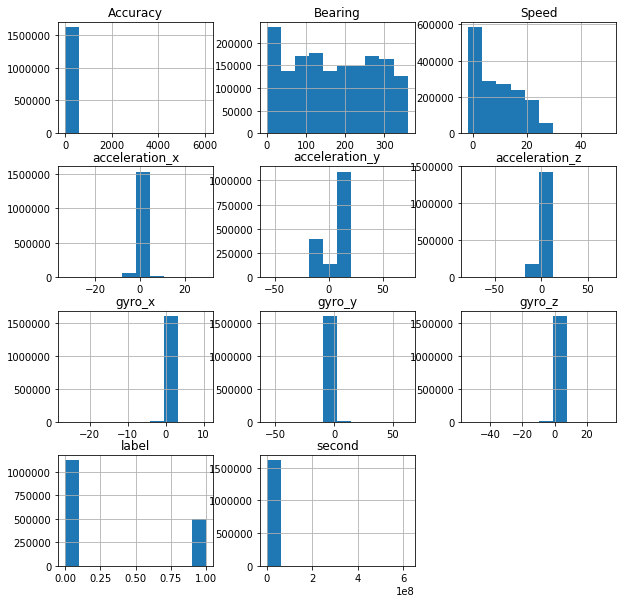

In [9]:
#Plot histograms for each variable to better understand the data
df.hist(figsize = (10,10))
plt.show()

In [10]:
#Create X and Y datasets for training and validation
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.001)

In [11]:
# Specify testing options
seed = 8
scoring = 'accuracy'

In [ ]:
#Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

#Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=2, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.687813 (0.000089)
